## 1. Подключение нужных библиотек

In [1]:
# import cv2   
import numpy as np              # для форматирования матриц изображений
import tensorflow as tf         # для загрузки датасета, построения и обучения нейронной сети
import matplotlib.pyplot as plt # для визуального отображения результатов

# 2. Загрузка датасета 

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

### Описание данных
- X - матрицы изображений со значениями от 0 до 255, обозначающие цвет клетки
- y - числа, ожидаемые результаты отработки нейронной сети

### Разделение данных
- _train - данные для обучения нейронной сети
- _test - данные, с помощью которых будет проводиться отображение точности отработки нейронной сети

### Количество элементов
- _train элементов - 60 000
- _test элементов - 10 000

# 3. Визуализация данных

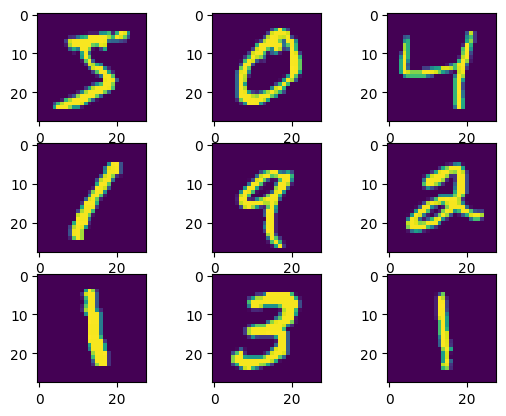

In [3]:
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train[cnt])
        cnt += 1

- В данном коде создается сетка из 9 графиков, в каждый из которых последовательно передаются элементы из массива X_train

# 4. Нормализация данных

In [4]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

- Уменьшаем данные до интервала от 0 до 1 для лучшей сходимости функций на узлах

# 5. Строим нейронную сеть

In [5]:
model = tf.keras.models.Sequential() # создали объект нейронной сети

In [6]:
model.add(tf.keras.layers.Input(shape=(28, 28))) # входной слой
model.add(tf.keras.layers.Flatten()) 
# скрытый слой для преобразования входного слоя, состоящего из матриц 28х28
# в вектор размером 28 * 28 

In [7]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu)) # 1ый скрытый слой
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu)) # 2ой скрытый слой

In [8]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)) # выходной слой

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

- Создали полносвязную модель, состоящую из входного узла, двух скрытых и одного выходного узла

# 6. Компилируем нейронную сеть

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 7. Тренируем нейронную сеть

In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8303 - loss: 0.6531
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9526 - loss: 0.1574
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.0985
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0705
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0516
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0401
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.0319
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9923 - loss: 0.0264
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9937 - loss: 0.0207
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9954 - loss: 0.0148


- epochs - число полных проходов нейронной сети по всему набору обучающих данных (в нашем случае матрицам изображений чисел) 
- batch_size - кол-во примеров поданных в модель, после которых нейронная сеть будет обновлять веса (позволяет сбалансировать скорость обучения и использование памяти)

# 8. Оценка точности модели 

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.9670 - loss: 0.1330
0.11718226224184036
0.9713000059127808


- На основе тестовых данных определили значение функции потерь и точность модели 

# 9. Использование модели

- Модель предсказывает вероятности принадлежности изображения каждого числа в наборе X_train к каждому числу (от 0 до 9)

In [13]:
prediction = model.predict(X_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step


array([[9.4329228e-14, 1.2458621e-11, 1.5206054e-09, ..., 1.0000000e+00,
        1.5290651e-14, 6.5195266e-11],
       [1.8987971e-12, 4.9168229e-06, 9.9999511e-01, ..., 6.2584785e-12,
        1.0824707e-10, 3.3475444e-17],
       [5.2835405e-12, 9.9998868e-01, 3.8989018e-08, ..., 9.5416981e-06,
        1.1121949e-06, 2.3338068e-10],
       ...,
       [1.1585859e-13, 9.5203729e-09, 1.5684616e-12, ..., 3.6894956e-08,
        1.2440347e-09, 4.7700411e-07],
       [1.3457786e-10, 2.8186467e-11, 7.4497553e-10, ..., 4.1756512e-10,
        1.1500672e-05, 1.4013637e-12],
       [3.1464814e-10, 4.1520464e-11, 5.3365068e-09, ..., 1.6425273e-13,
        2.4072441e-12, 2.0888504e-12]], dtype=float32)

- Вывод вероятностей принадлежности конкретного изображения к каждому классу чисел
- Вывод числа, к которому вероятность принадлежности модели больше всего 

In [14]:
print('Probabilities: ', prediction[1])
print('\n')
print('Prediction: ', np.argmax(prediction[1]))


Probabilities:  [1.8987971e-12 4.9168229e-06 9.9999511e-01 1.7306759e-08 1.0811577e-15
 1.0773507e-09 2.0882607e-10 6.2584785e-12 1.0824707e-10 3.3475444e-17]


Prediction:  2


- Отрисовка изображения 

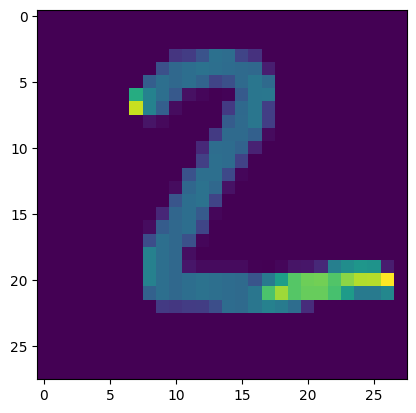

In [15]:
plt.imshow(X_test[1])
plt.show()